In [1]:
from my_hmf import *
import numpy as np
import matplotlib.pyplot as plt

### Test du changement de redshift

In [2]:
cosmo_params = {
    "H0": 70,
    "Om0": 0.294,
    "Ob0": 0.022 / 0.7**2,
    "ns": 0.965,
    "As": 2e-9
}

z = 1

In [8]:
mf1 = My_Tinker08(z=z, cosmo_params=cosmo_params)
mf2 = My_Tinker08(z=0, cosmo_params=cosmo_params)

mf2.set_z(z=z)

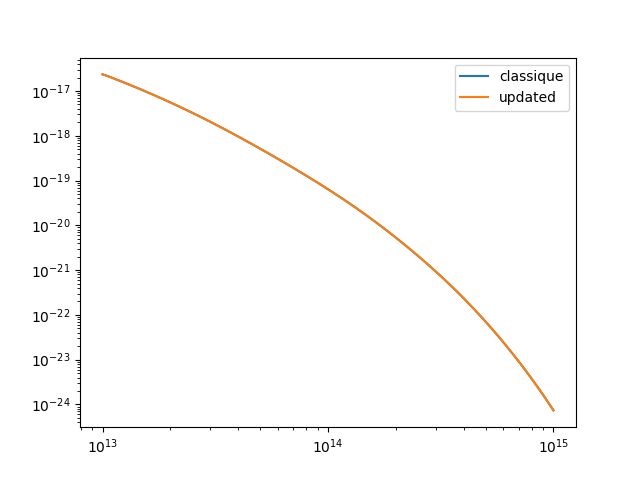

In [9]:
%matplotlib widget
## Test dndm
plt.figure()
plt.xscale("log")
plt.yscale("log")
plt.plot(mf1.m, mf1.dndm, label="classique")
plt.plot(mf2.m, mf2.dndm, label="updated")
plt.legend()
plt.show()

### Test du calcul du number count

In [3]:
N_z = 5
zmax = 1

In [5]:
z, number_count = get_number_count(cosmo_params, N_z, zmax)

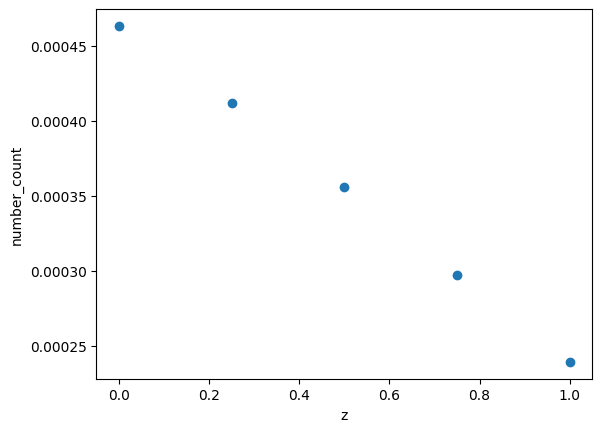

In [6]:
plt.figure()
# plt.xscale("log")
# plt.yscale("log")
plt.plot(z, number_count, 'o')
plt.xlabel("z")
plt.ylabel("number_count")
plt.show()

# MCMC

In [4]:
s = Study(N_z,zmax, ["Om0","As"], knownpars = cosmo_params)
s.create_artificial_data(cosmo_params)

In [15]:
N = 10
thetai = np.array([0.4, 3e-9])
step = 0.1*thetai

L_pars, L_chi2 = s.calc_params(thetai, N, step)

[4.e-01 3.e-09]
492.56689522598344
[3.77884166e-01 3.20183428e-09]
382.6029348292824
0.18970493479828465
Kept !
[3.41793380e-01 3.32878425e-09]
214.78306920244685
0.9834968685642721
Kept !
[3.62664400e-01 3.62448556e-09]
329.4936916552707
0.5174491130409874
Kept !
[2.81167182e-01 3.51708619e-09]
30.484239472927747
0.7625686435035912
Kept !
[2.71606916e-01 3.54469603e-09]
16.185961820572217
0.4007009897641869
Kept !
[2.56793475e-01 3.36039747e-09]
2.5192034842383104
0.16241351675215276
Kept !
[2.48100843e-01 3.10930004e-09]
7.40750569198755
0.08994614391891498
Kept !
[2.71769611e-01 3.12641556e-09]
6.850760598622509
0.5551876893152456
Kept !
[3.18602702e-01 3.49683764e-09]
132.85350859145797
0.4951957554761879


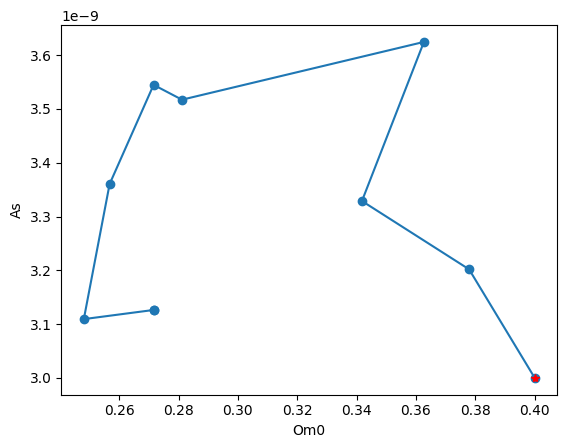

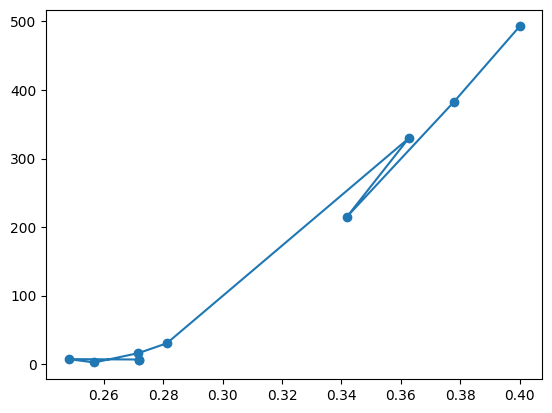

In [19]:
plt.figure()
plt.plot(L_pars[:,0], L_pars[:,1], 'o-')
plt.plot(L_pars[0,0], L_pars[0,1], '*', color='red')
plt.xlabel("Om0")
plt.ylabel("As")
plt.show()
plt.plot(L_pars[:,0], L_chi2, 'o-')